In [1]:
import numpy as np #hỗ trợ thêm cho các mảng và ma trận lớn
import pandas as pd #cung cấp các cấu trúc dữ liệu và các phép toán để thao tác với các bảng số và chuỗi thời gian.
import matplotlib.pyplot as plt #thư viện vẽ đồ thị
from random import sample 
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix #hình dung hiệu suất của một thuật toán
from sklearn import tree
from math import log,exp

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
wine = pd.read_csv("red-wine.csv")  #Đọc file dataset

In [4]:
wine = wine.drop('Unnamed: 0', axis=1)  #Xóa bỏ cột số mặc định của file

In [5]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
#Khảo sát trên 2 loài hoa
example = wine[(wine['quality'] == 5) | (wine['quality'] == 7)]

In [7]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5


In [8]:
example['Label'] = example['quality'].replace(to_replace = [5, 7], value=[1,-1]) 
#Thay thế cột quality thành Label với giá trị 5=1 và 6=-1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9172\1690907484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Label'] = example['quality'].replace(to_replace = [5, 7], value=[1,-1])


In [9]:
example = example.drop('quality', axis = 1) #Xóa cột Species

In [10]:
#Tập khảo sát trên 2 loại ruou nên dataset giờ chỉ còn 138
example['probR1'] = 1/(example.shape[0])

In [11]:
example.shape[0] #Số lượng dòng trong dataset

164

In [12]:
#In ra 5 giá trị đầu
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098


In [13]:
#Chọn ngẫu nhiên
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [14]:
example1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1
209,11.0,0.300,0.58,2.1,0.054,7,19,0.9980,3.31,0.88,10.5,-1,0.006098
39,7.3,0.450,0.36,5.9,0.074,12,87,0.9978,3.33,0.83,10.5,1,0.006098
23,8.5,0.490,0.11,2.3,0.084,9,67,0.9968,3.17,0.53,9.4,1,0.006098
132,5.6,0.500,0.09,2.3,0.049,17,99,0.9937,3.63,0.63,13.0,1,0.006098
17,8.1,0.560,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3,1,0.006098
139,7.8,0.560,0.19,2.0,0.081,17,108,0.9962,3.32,0.54,9.5,1,0.006098
63,7.0,0.735,0.05,2.0,0.081,13,54,0.9966,3.39,0.57,9.8,1,0.006098
193,7.6,0.550,0.21,2.2,0.071,7,28,0.9964,3.28,0.55,9.7,1,0.006098
74,9.7,0.320,0.54,2.5,0.094,28,83,0.9984,3.28,0.82,9.6,1,0.006098
175,6.9,0.500,0.04,1.5,0.085,19,49,0.9958,3.35,0.78,9.5,1,0.006098


In [15]:
X_train = example1.iloc[0:len(wine),0:11]
y_train = example1.iloc[0:len(wine),11]

In [16]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
209,11.0,0.30,0.58,2.1,0.054,7,19,0.9980,3.31,0.88,10.5
39,7.3,0.45,0.36,5.9,0.074,12,87,0.9978,3.33,0.83,10.5
23,8.5,0.49,0.11,2.3,0.084,9,67,0.9968,3.17,0.53,9.4
132,5.6,0.50,0.09,2.3,0.049,17,99,0.9937,3.63,0.63,13.0
17,8.1,0.56,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3


In [17]:
y_train.head(5)

209   -1
39     1
23     1
132    1
17     1
Name: Label, dtype: int64

In [18]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train) #Đào tạo mô hình trên dữ liệu
#X_train là dataset.data
#y_train là dataset.target
#Gini Impurity là chỉ số thể hiện mức độ phân loại sai khi ta chọn ngẫu nhiên một phần tử từ tập data.

[Text(0.5, 0.75, 'X[0] <= 9.45\ngini = 0.223\nsamples = 164\nvalue = [21, 143]'),
 Text(0.25, 0.25, 'gini = 0.114\nsamples = 149\nvalue = [9, 140]'),
 Text(0.75, 0.25, 'gini = 0.32\nsamples = 15\nvalue = [12, 3]')]

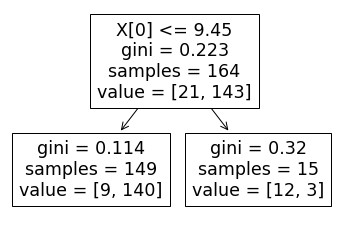

In [19]:
tree.plot_tree(clf)

In [20]:
y_pred = clf_gini.predict(example.iloc[0:len(wine),0:11])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1], dtype=int64)

In [21]:
example['pred1'] = y_pred

In [22]:
clf.score(X_train, y_train)

0.926829268292683

In [23]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1


In [24]:
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [25]:
e1 = sum(example['misclassified'] * example['probR1'])

In [26]:
example['misclassified'].head(5)

0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: misclassified, dtype: float64

In [27]:
e1

0.06097560975609755

In [28]:
alpha1 = 0.5*log((1-e1)/e1)

In [29]:
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [30]:
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [31]:
z

0.4785711431792326

In [32]:
new_weight

0      0.001554
1      0.001554
2      0.001554
4      0.001554
5      0.001554
6      0.001554
7      0.023929
8      0.023929
9      0.001554
10     0.001554
11     0.001554
12     0.001554
13     0.001554
14     0.001554
15     0.001554
16     0.023929
17     0.001554
21     0.001554
22     0.001554
23     0.001554
25     0.001554
26     0.001554
27     0.001554
28     0.001554
30     0.001554
32     0.001554
34     0.001554
37     0.023929
39     0.001554
40     0.001554
43     0.001554
44     0.001554
46     0.001554
47     0.001554
48     0.001554
49     0.001554
50     0.001554
53     0.001554
55     0.001554
56     0.023929
57     0.001554
58     0.001554
60     0.001554
61     0.001554
62     0.023929
63     0.001554
64     0.001554
65     0.001554
66     0.001554
67     0.001554
68     0.001554
71     0.001554
72     0.001554
74     0.023929
75     0.001554
76     0.001554
78     0.001554
80     0.001554
81     0.001554
82     0.001554
83     0.001554
85     0.001554
87     0

In [33]:
example['prob2'] = round(normalized_weight,4)

In [34]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1,misclassified,prob2
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1,0.0,0.0032
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1,0.0,0.0032
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1,0.0,0.0032
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1,1.0,0.0500
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1,1.0,0.0500
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1,0.0,0.0032
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1,0.0,0.0032


In [35]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:12]
X_train = example2.iloc[0:len(wine),0:11]
y_train = example2.iloc[0:len(wine), 11]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(wine),0:11])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

In [36]:
y_pred

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1], dtype=int64)

[Text(0.5, 0.75, 'X[4] <= 0.067\ngini = 0.487\nsamples = 164\nvalue = [69, 95]'),
 Text(0.25, 0.25, 'gini = 0.229\nsamples = 53\nvalue = [46, 7]'),
 Text(0.75, 0.25, 'gini = 0.329\nsamples = 111\nvalue = [23, 88]')]

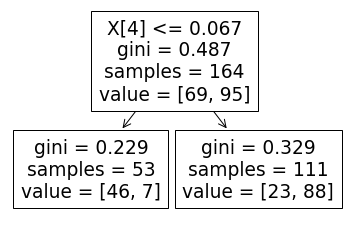

In [37]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [38]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1,misclassified,prob2,pred2
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1,0.0,0.0032,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1,0.0,0.0032,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1,0.0,0.0032,1
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1,1.0,0.0500,-1
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1,1.0,0.0500,1
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1,0.0,0.0032,1
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1,0.0,0.0032,1


In [39]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [40]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.19480000000000008

In [41]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

0.7095586512786005

In [42]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [43]:
example['prob3'] = round(normalized_weight,4)

In [44]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1,1.0,0.0500,-1,0.0,0.0312
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1,1.0,0.0500,1,1.0,0.1289
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1,0.0,0.0032,1,0.0,0.0020
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1,0.0,0.0032,1,0.0,0.0020


In [45]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:12]
X_train = example3.iloc[0:len(wine),0:11]
y_train = example3.iloc[0:len(wine),11]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(wine),0:11])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'X[3] <= 2.15\ngini = 0.496\nsamples = 164\nvalue = [75, 89]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 111\nvalue = [74, 37]'),
 Text(0.75, 0.25, 'gini = 0.037\nsamples = 53\nvalue = [1, 52]')]

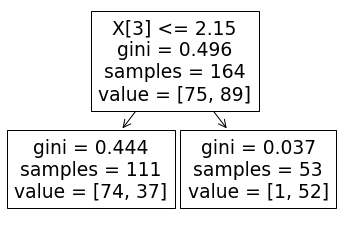

In [46]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [47]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [48]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.24900000000000014

In [49]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [50]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [51]:
example['prob4'] = round(normalized_weight,4)

In [52]:
example.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040
7,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1,1.0,0.0500,-1,0.0,0.0312,-1,0.0,0.0208
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1,1.0,0.0500,1,1.0,0.1289,-1,0.0,0.0857
9,7.5,0.50,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013
10,6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040


In [53]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:12]
X_train = example4.iloc[0:len(wine),0:11]
y_train = example4.iloc[0:len(wine),11]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(wine),0:11])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'X[1] <= 0.305\ngini = 0.494\nsamples = 164\nvalue = [73, 91]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.75, 0.25, 'gini = 0.446\nsamples = 137\nvalue = [46, 91]')]

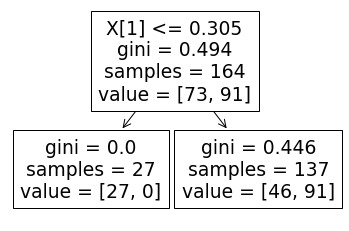

In [54]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)


In [55]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [56]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.2807

In [57]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [58]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.3671837547097918
0.7095586512786005
0.5519763776497132
0.47049601675273695


In [59]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [60]:
t

0      1.995262
1      3.099215
2      3.099215
4      1.995262
5      1.995262
6      1.995262
7      0.576145
8      1.995262
9      3.099215
10     1.995262
11     3.099215
12     1.995262
13     1.995262
14     3.099215
15     3.099215
16     1.054270
17     1.995262
21     3.099215
22     1.995262
23     3.099215
25     1.995262
26     1.995262
27     1.995262
28     1.995262
30     3.099215
32     3.099215
34     1.995262
37     0.576145
39     3.099215
40     3.099215
43     3.099215
44     0.576145
46     3.099215
47     1.054270
48     0.576145
49     1.995262
50     1.995262
53     3.099215
55     3.099215
56     0.364847
57     3.099215
58     3.099215
60     3.099215
61     1.995262
62     1.995262
63     1.995262
64     3.099215
65     3.099215
66     1.995262
67     1.995262
68     1.995262
71     1.995262
72     1.995262
74     0.364847
75     3.099215
76     3.099215
78     1.995262
80     1.995262
81     1.995262
82     1.995262
83     1.995262
85     3.099215
87     0

In [61]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1.])

In [62]:
example['final_pred'] = np.sign(list(t))

In [63]:
example.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
0,7.4,0.700,0.00,1.90,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040,1,0.0,1.0
1,7.8,0.880,0.00,2.60,0.098,25,67,0.9968,3.20,0.68,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013,1,0.0,1.0
2,7.8,0.760,0.04,2.30,0.092,15,54,0.9970,3.26,0.65,9.8,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013,1,0.0,1.0
4,7.4,0.700,0.00,1.90,0.076,11,34,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040,1,0.0,1.0
5,7.4,0.660,0.00,1.80,0.075,13,40,0.9978,3.51,0.56,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040,1,0.0,1.0
6,7.9,0.600,0.06,1.60,0.069,15,59,0.9964,3.30,0.46,9.4,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040,1,0.0,1.0
7,7.3,0.650,0.00,1.20,0.065,15,21,0.9946,3.39,0.47,10.0,-1,0.006098,1,1.0,0.0500,-1,0.0,0.0312,-1,0.0,0.0208,1,1.0,1.0
8,7.8,0.580,0.02,2.00,0.073,9,18,0.9968,3.36,0.57,9.5,-1,0.006098,1,1.0,0.0500,1,1.0,0.1289,-1,0.0,0.0857,1,1.0,1.0
9,7.5,0.500,0.36,6.10,0.071,17,102,0.9978,3.35,0.80,10.5,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,1,0.0,0.0013,1,0.0,1.0
10,6.7,0.580,0.08,1.80,0.097,15,65,0.9959,3.28,0.54,9.2,1,0.006098,1,0.0,0.0032,1,0.0,0.0020,-1,1.0,0.0040,1,0.0,1.0


In [64]:
#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[  6,   8],
       [  0, 150]], dtype=int64)

In [65]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

95.1219512195122

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
wine = pd.read_csv("red-wine.csv")  
wine = wine.drop('Unnamed: 0', axis=1)
wine = wine[(wine['quality'] == 5) | (wine['quality'] == 7)]

In [68]:
#X_train and Y_train split
X_train = wine.iloc[0:len(wine),0:11]
y_train = wine.iloc[0:len(wine),11]

In [69]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [70]:
clf.predict([[7.3, 0.65, 0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10]])

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [71]:
clf.score(X_train, y_train)

0.9390243902439024